**Import Libraries**

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

**Mount Drive**

In [126]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Add Font Path**

In [127]:
# you can download the font from here: https://drive.google.com/file/d/1qEQtAztbqDIemHqburVEW3eqfGY9FP9z/view?usp=share_link

font_path='/content/drive/MyDrive/Research/Pure Bengali Font In Matplotlib/Fonts/Kalpurush_ANSI-Regular.ttf'

**Dataset linkup**

In [128]:
# you can download the dataset from here for practice purpose:  https://docs.google.com/spreadsheets/d/1WbGYGE5lTzLJ-8y_PcVlxtmIyMqkDBeZ/edit?usp=share_link&ouid=109870607108456639186&rtpof=true&sd=true

data_url='/content/drive/MyDrive/Research/Pure Bengali Font In Matplotlib/DataSet/Bengali data.xlsx'
df=pd.read_excel(data_url)

In [129]:
df.head()

,bengali_column
0,উপন্যাস এবং সাহিত্য
1,শিক্ষামূলক
2,প্রাত্যহিক জীবন
3,রিলিজন
4,প্রাত্যহিক জীবন


*** Let's Convert All Unicode Text(We know, Our Default Font Format is Unicode) to Bijoy format. Here, I have created another column of Bijoy Coverted text.***

In [130]:
pip install bijoy2unicode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [131]:
def convert_unicode_to_bijoy(text):
    if isinstance(text, str) and len(text) > 0:
        if text is not None:
            test = converter.Unicode()
            text = test.convertUnicodeToBijoy(text)
        else:
            text = '' # set empty string as default
    else:
        text = '' # set empty string as default
    return text

# Create a new column with the converted text
df['Bijoy_Converted_column'] = df['bengali_column'].apply(convert_unicode_to_bijoy)


**Now Final Code for out desire output**

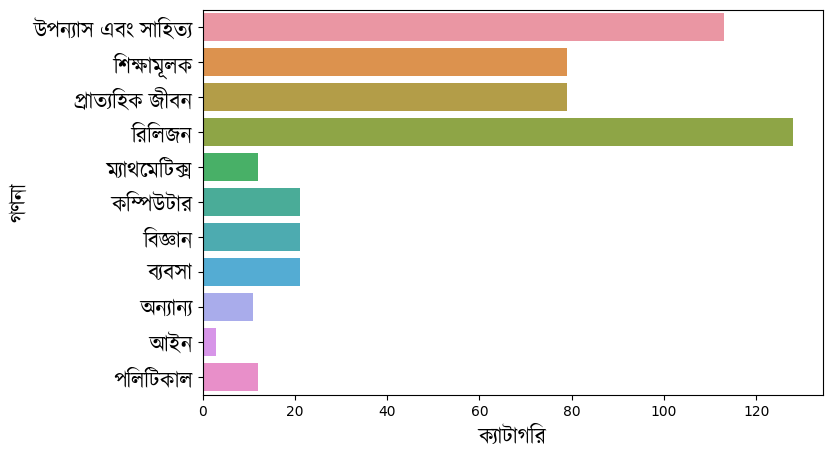

In [132]:
def get_label_properties(label):
    return font_manager.FontProperties(fname=font_path, size=16)

# Apply the function to the 'Bijoy_Converted_column' column to get the font properties for each label
label_properties = df['Bijoy_Converted_column'].apply(get_label_properties)

# Set the font properties for the title and axis labels
font_properties = font_manager.FontProperties(fname=font_path, size=16)

# Create a countplot with the new column
plt.subplots(figsize=(8, 5))
ax = sns.countplot(y='Bijoy_Converted_column', data=df)

# Set the font properties for each label using the label_properties Series object
for i, label in enumerate(ax.get_yticklabels()):
    label.set_fontproperties(label_properties.iloc[i])

# ax.set_title('ag©xq', fontproperties=font_properties)
ax.set_xlabel(convert_unicode_to_bijoy('ক্যাটাগরি'), fontproperties=font_manager.FontProperties(fname=font_path, size=16))
ax.set_ylabel(convert_unicode_to_bijoy('গণনা'), fontproperties=font_manager.FontProperties(fname=font_path, size=16))

plt.show()

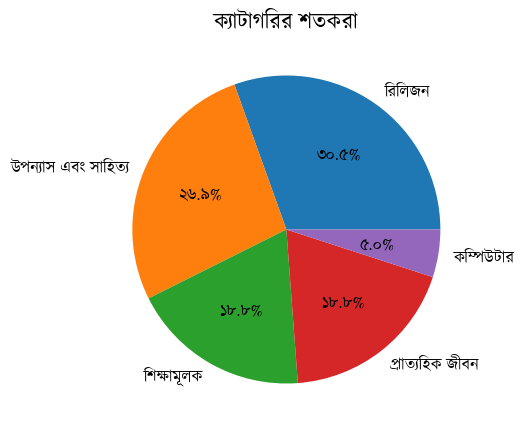

In [133]:
font_properties = font_manager.FontProperties(fname=font_path, size=12)
# Create pie chart
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(list(df['Bijoy_Converted_column'].value_counts()[0:5]), labels=list(df['Bijoy_Converted_column'].value_counts()[0:5].keys()), autopct='%0.1f%%')

plt.title(convert_unicode_to_bijoy('ক্যাটাগরির শতকরা'), fontproperties=font_manager.FontProperties(fname=font_path, size=16))

# Set font properties for text
for text in texts:
    text.set_fontproperties(font_properties)

# Set font properties for auto text
for autotext in autotexts:
    autotext.set_fontproperties(font_properties)

plt.show()

In [134]:
# df.to_excel('/content/drive/MyDrive/Research/Pure Bengali Font In Matplotlib/Benglai data with Bijoy.xlsx', index=False)

In [135]:
# df.head()

,bengali_column,Bijoy_Converted_column
0,উপন্যাস এবং সাহিত্য,Dcb¨vm Ges mvwnZ¨
1,শিক্ষামূলক,wk¶vg~jK
2,প্রাত্যহিক জীবন,c«vZ¨wnK Rxeb
3,রিলিজন,wiwjRb
4,প্রাত্যহিক জীবন,c«vZ¨wnK Rxeb


In [136]:
# df.drop('Bijoy_Converted_column', axis=1, inplace=True)

In [137]:
# df.head()

,bengali_column
0,উপন্যাস এবং সাহিত্য
1,শিক্ষামূলক
2,প্রাত্যহিক জীবন
3,রিলিজন
4,প্রাত্যহিক জীবন
